# Прогнозирование оттока клиентов из банка

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Изменение-порога.-AUC-ROC-score-и-ROC-кривая" data-toc-modified-id="Изменение-порога.-AUC-ROC-score-и-ROC-кривая-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изменение порога. AUC-ROC score и ROC кривая</a></span></li><li><span><a href="#Подытожим" data-toc-modified-id="Подытожим-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Подытожим</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Для начала импортируем все необходимое.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score


In [2]:
df = pd.read_csv('/datasets/Churn.csv')

Выведем на экран первые 15 строчек таблицы, затем посмотрим типы данных в каждом столбце и проверим датасет на предмет пропусков

In [3]:
df.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Для OHE нам в дальнейшем будет мешать колонка Surname - в ней почти все значения уникальные, следовательно, удалим ее. Также удалим колонку Customer Id - эти данные никак нам не помогут при обучении модели.

In [4]:
df = df.drop('CustomerId', axis = 1, inplace=False)
df = df.drop('Surname', axis = 1, inplace=False)
df = df.drop('RowNumber', axis = 1, inplace=False)


In [5]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Колонки удалились. Смотрим датасет дальше.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   CreditScore      10000 non-null  int64  

 1   Geography        10000 non-null  object 

 2   Gender           10000 non-null  object 

 3   Age              10000 non-null  int64  

 4   Tenure           9091 non-null   float64

 5   Balance          10000 non-null  float64

 6   NumOfProducts    10000 non-null  int64  

 7   HasCrCard        10000 non-null  int64  

 8   IsActiveMember   10000 non-null  int64  

 9   EstimatedSalary  10000 non-null  float64

 10  Exited           10000 non-null  int64  

dtypes: float64(3), int64(6), object(2)

memory usage: 859.5+ KB


In [7]:
df.isna().count()

CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

Как мы видим из полученных данных - пропуски присутствуют в столбце Tenure - здесь содержится информация о том, сколько лет человек является клиентом банка. Данные пропуски заполним медианным значением столбца - это наиболее адекватное заполнение.

In [8]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   CreditScore      10000 non-null  int64  

 1   Geography        10000 non-null  object 

 2   Gender           10000 non-null  object 

 3   Age              10000 non-null  int64  

 4   Tenure           10000 non-null  float64

 5   Balance          10000 non-null  float64

 6   NumOfProducts    10000 non-null  int64  

 7   HasCrCard        10000 non-null  int64  

 8   IsActiveMember   10000 non-null  int64  

 9   EstimatedSalary  10000 non-null  float64

 10  Exited           10000 non-null  int64  

dtypes: float64(3), int64(6), object(2)

memory usage: 859.5+ KB


Пропуски заполнены. Теперь наш датасет представляет собой 10000 заполненных строк. Перейдем к разбивке на выборки.

Предлагаю использовать следующие размеры выборок:
- Обучающая выборка - 60%
- Валидационная выборка - 20%
- Тестовая выборка - 20%

Чтобы у нас получилось разделить датасет методом train_test_split на 3 выборки - применим метод дважды. То есть, сначала разделим данные на обучающую и валидационную выборки в пропорции 60/40, а затем разделим валидационную пополам. Test_size тогда в первом случае будет 0.4, а во втором 0.5.

Но для начала воспользуемся кодированием ОНЕ, чтобы поменять значения в столбцах Gender и Geography на 0/1/2. Это необходимо для корректного обучения модели вдальнейшем. 

In [10]:
data = pd.get_dummies(df, drop_first=False)#применяем OHE
target = data['Exited']#перед разбивкой создадим целевой и тестовый признаки для наших выборок
features = data.drop('Exited', axis=1)

In [11]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, 
    target, 
    test_size=0.4, 
    random_state=12345) #делим на обучающую и валидационную

In [12]:
features_test, features_valid, target_test, target_valid = train_test_split(
    features_valid, 
    target_valid,
    test_size=0.5,
    random_state=12345) #делим на валидационную и тестовую

Теперь посмотрим размеры этих выборок. Для этого воспользуемся методом shape.

In [13]:
print('Размер тренировочной выборки тестовых признаков:', features_train.shape)
print('Размер тренировочной выборки целевого признака:', target_train.shape)
print('Размер валидационной выборки тестовых признаков:', features_valid.shape)
print('Размер валидационной выборки целевого признака:', target_valid.shape)
print('Размер тестовой выборки тестовых признаков:', features_test.shape)
print('Размер тестовой выборки целевого признака:', target_test.shape)


Размер тренировочной выборки тестовых признаков: (6000, 13)

Размер тренировочной выборки целевого признака: (6000,)

Размер валидационной выборки тестовых признаков: (2000, 13)

Размер валидационной выборки целевого признака: (2000,)

Размер тестовой выборки тестовых признаков: (2000, 13)

Размер тестовой выборки целевого признака: (2000,)


Разбивка на признаки в пропорции 3/1/1. Вызовем первые 10 строк датасета, чтобы посмотреть применилось ли кодирование.

In [14]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0


Применим масштабирование методом Standard Scaler.

In [15]:
features_train = pd.DataFrame(features_train, columns = features.columns)
features_valid = pd.DataFrame(features_valid, columns = features.columns)
features_test = pd.DataFrame(features_test, columns = features.columns)
scaler = StandardScaler()
numeric=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


Итак, данные подготовлены к обучению моделей. Для этого мы удалили все не несущие полезной информации для моделей столбцы, проверили данные на предмет пропусков и заполнили имеющиеся (в нашем случае хорошо подошло медианное значение), применили кодирование к интересущим нас признакам (чтобы получить 0 и 1 для моделей), разбили данные на тренировочную(60%), валидационную (20%) и тестовую (20:) выборки, чтобы их соотношение стало 3/1/1, а также масштабировали признаки.

## Исследование задачи

Перед нами стоит задача классификации - уйдет ли клиент из банка или нет (0 или 1). Соответственно, в самом начале мы выгрузили модели классификации. Начнем со случайного леса. В данном пункте мы не балансируем классы. Будем искать наилучшую F1 меру для каждой модели, а также лучшую площадь roc-кривой (кривой, показывающей насколько наша модель отличается от случайной)

### Случайный лес

Как мы выяснили в прошлом пункте - классы несбалансированные. Попробуем обучить модель случайного леса с количеством n-эстиматоров 50, 100 и шагом 5,и глубиной 8-22

In [20]:
best_model = None
best_result = 0
for est in range(50, 100, 5):
    for depth in range(8, 22):
        model = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions)
        if result > best_result:
            best_model = model
            best_result = result
            
probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

print("F1 score лучшей модели на валидационной выборке:", best_result)           

Площадь ROC-кривой: 0.42102539044257903

F1 score лучшей модели на валидационной выборке: 0.5517241379310345


F1 score 0,55 и площадь roc-кривой 0,421 - результат неплохой.  Попробуем обучить модель Descision Tree.

### Дерево решений

Дерево решений булем обучать на глубине 2 - 150. Посмотрим как поменяется F1 score.

In [16]:
best_model = None
best_result = 0
for depth in range(2, 150):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth) # задаем глубину дерева 2 - 150
    model.fit(features_train,target_train) # обучаем
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions) 
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

print("F1 score лучшей модели на валидационной выборке:", best_result)           

Площадь ROC-кривой: 0.4699502134041518

F1 score лучшей модели на валидационной выборке: 0.5287671232876712


Полученный результат 0,526 меньше, чем на модели случайного леса, но при этом площадь roc-кривой выше - составляет 0,469. Количество деревьев в 150 очень большое, так что можем считать его максимально дорустимым на такой объем данных. Проверим следующую модель - логистической регрессии. 

### Логистическая регрессия

In [18]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model.fit(features_train, target_train) 
predictions = model.predict(features_valid)
result = f1_score(target_valid, predictions)

probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

print("F1 score на валидационной выборке:", result)           

Площадь ROC-кривой: 0.501403706181344

F1 score на валидационной выборке: 0.27478260869565213


Модель показала очень низкий показатель F1 score, но зато самый высокий показатель roc-кривой - 0,5.

На данном этапе лучше всего, при имеющемся дисбалансе классов, лучший результат показала модель случайного леса - ее F1 score составляет 0,541, хотя площадь roc-кривой в ней 0,46 (что меньше, чем у модели дерева решений).

Попробуем устранить дисбаланс классов путем увеличения/уменьшения выборки, а также изменением порога классификации и посмотрим как поведут себя наши модели.

## Борьба с дисбалансом

### Взвешивание классов

Начнем с взвешивания. Для этого применим параметр class_weight = balanced ко всем используемым нами моделям. Начнем со случайного леса.

In [21]:
best_model = None
best_result = 0
for est in range(50, 100, 5):
    for depth in range(8, 22):
        model = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions)
        if result > best_result:
            best_model = model
            best_result = result
            
probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

print("F1 score лучшей модели на валидационной выборке:", best_result)    

Площадь ROC-кривой: 0.4140913507002286

F1 score лучшей модели на валидационной выборке: 0.6162528216704289


По результату "взвешивания", то есть предания более редкому классу большего "веса", модель случайного леса показывает отличный результат F1 метрики - 0,616. Площадь roc-кривой при этом составляет 0,414 - меньше, чем было ранее. Проверим остальные модели аналогчным принципом.

"Взвесим классы" в дереве решений.

In [23]:
best_model = None
best_result = 0
for depth in range(2, 150):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth, class_weight='balanced')
    model.fit(features_train,target_train) # обучаем
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions) 
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))        
print("F1 score лучшей модели на валидационной выборке:", best_result)    

Площадь ROC-кривой: 0.5816372988202494

F1 score лучшей модели на валидационной выборке: 0.5809128630705395


Как мы видим, здесь метрика F1 также выросла - после "взвешивания" она стала 0,58. Такое же значение составила и площадь roc-кривой. Проверим далее модель логистической регрессии.

In [24]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000, class_weight='balanced') 
model.fit(features_train, target_train) 
predictions = model.predict(features_valid)
result = f1_score(target_valid, predictions)

probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

print("F1 score на валидационной выборке:", result)

Площадь ROC-кривой: 0.5017239464975192

F1 score на валидационной выборке: 0.4775086505190312


На логистической регрессии также заметно увеличение метрики. 0,47 против 0,27 с дисбалансированными классами.Площадь кривой не изменилась. Попробуем увеличить выборку.

### Увеличение выборки

Добьемся того, чтобы объекты редкого класса стали в нашей выборке не такими редкими. Для этого:
- разделим обучающую выборку на отрицательные и положительные объекты;
- скопируем несколько раз положительные объекты;
- с учётом полученных данных создадим новую обучающую выборку;
- перемешаем данные: идущие друг за другом одинаковые вопросы не помогут обучению.

In [25]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)   


Мы сделали подготовку для увеличения выборки. Теперь применим ее пооочередно на наших моделей. Начнем с модели случайного леса.

In [31]:
best_model = None
best_result = 0
for est in range(50, 100, 5):
    for depth in range(8, 22):
        model = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth)
        model.fit(features_upsampled, target_upsampled)
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions)
        if result > best_result:
            best_model = model
            best_result = result


probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))
print("F1 score лучшей модели на валидационной выборке:", best_result)    

Площадь ROC-кривой: 0.4287445722672565

F1 score лучшей модели на валидационной выборке: 0.6161616161616161


Метрика F1 уменьшилась по сравнению с "взвешивание классов" хоть и не намного, но тем не менее - 0,6161 против 0,6162 ранее. Площадь кривой составила 0,42.

Перейдем к модели дерева решений.

In [27]:
best_model = None
best_result = 0
for depth in range(2, 150):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions) 
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))
print("F1 score лучшей модели на валидационной выборке:", best_result)

Площадь ROC-кривой: 0.5816372988202494

F1 score лучшей модели на валидационной выборке: 0.5809128630705395


Здесь метрика F1 осталась прежней. Площадь roc-кривой составляет 0,58.

Проверим логистическую регрессию.

In [40]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_valid)
result = f1_score(target_valid, predictions)

probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))
print("F1 score на валидационной выборке:", result)

Площадь ROC-кривой: 0.5017239464975192

F1 score на валидационной выборке: 0.47619047619047616


А здесь метрика немного уменьшилась (получили 0,476 против 0,477).Площадь кривой осталась таклй же - 0,501.

### Уменьшение выборки

Попробуем уменьшить выборку, чтобы сделать объекты частого класса не такими частыми. Этого можно добиться с помощью отбрасывания отрицательных ответов. Для этого:
- разделим обучающую выборку на отрицательные и положительные объекты;
- случайным образом отбросим часть из отрицательных объектов;
- с учётом полученных данных создадим новую обучающую выборку;
- перемешаем данные

In [32]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Снова попробуем модель случайного леса с новыми параметрами обучения.

In [33]:
best_model = None
best_result = 0
for est in range(50, 100, 5):
    for depth in range(8, 22):
        model = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth)
        model.fit(features_downsampled, target_downsampled)
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions)
        if result > best_result:
            best_model = model
            best_result = result

probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))
print("F1 score лучшей модели на валидационной выборке:", best_result)    

Площадь ROC-кривой: 0.4034250578784512

F1 score лучшей модели на валидационной выборке: 0.5854108956602031


Метрика уменьшилась сильно, а нам это не подходит. Попробуем другие модели с уменьшенной выборкой.

Посмотрим как будет себя вести дерево решений.

In [34]:
best_model = None
best_result = 0
for depth in range(2, 150):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model.fit(features_downsampled, target_downsampled)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions) 
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))
print("F1 score лучшей модели на валидационной выборке:", best_result)

Площадь ROC-кривой: 0.5132873992386608

F1 score лучшей модели на валидационной выборке: 0.5913875598086125


И здесь мы видим значительное уменьшение F1 score вместе с площадью кривой. Проверим логистическую регрессию.

In [41]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_valid)
result = f1_score(target_valid, predictions)

probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))
print("F1 score на валидационной выборке:", result)

Площадь ROC-кривой: 0.5017239464975192

F1 score на валидационной выборке: 0.47619047619047616


Здесь F1 метрика и площадь кривой остались теми же.

На основании полученных результатов можно сделать вывод, что уменьшение выборки для увеличения метрики F1 в данной задачи не подходит - метрика всех 3-х моделей значительно уменьшилась.

### Изменение порога. AUC-ROC score и ROC кривая

Для того, чтобы изменить порог классификации воспользуемся методом proba. Далее нарисуем график ROC кривой (кривой ошибок), чтобы понять как отличается наша обученная модель от случайной. А затем выведем метрику auc-roc, которая для правильно обученной модели должна стремиться к единице. Так сделаем для всех моделей - начнем со случайного леса

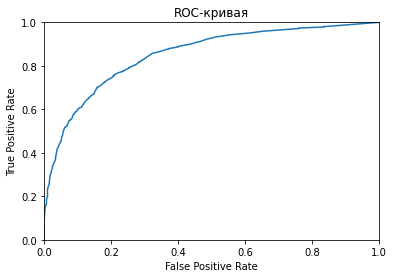

0.8511132997836813

F1 score на валидационной выборке: 0.5381165919282511


In [43]:
best_model = None
best_result = 0
for est in range(50, 100, 5):
    for depth in range(8, 22):
        model = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions)
        if result > best_result:
            best_model = model
            best_result = result
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)
print("F1 score на валидационной выборке:", result)

Как мы видим на графике - наша модель обучена хорошо. Также это подтверждает метрика auc-roc - она составляет 0,85. Это пока что наилучшее значение для модели случайного леса. Но при этом метрика F1 сильно уменьшилась - она составляет всего 0,538. Перейдем к дереву решений.

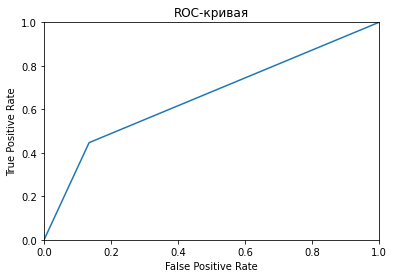

0.6561880219646784

F1 score на валидационной выборке: 0.4587378640776699


In [44]:
best_model = None
best_result = 0
for depth in range(2, 150):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions) 
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)
print("F1 score на валидационной выборке:", result)

На дереве решений ситуация чуть хуже, но, судя по графику, мдель также сильно отличается от случайной. Площадь кривой составляет 0,65. Также уменьшилась и метрика F1. Перейдем к логистической регрессии.

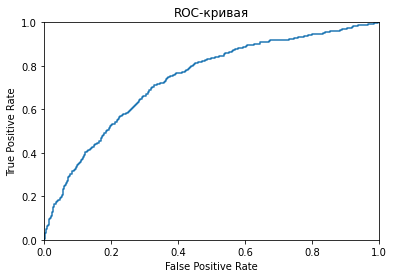

0.7386230251352555

F1 score на валидационной выборке: 0.27478260869565213


In [45]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
result = f1_score(target_valid, predictions)


probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)
print("F1 score на валидационной выборке:", result)

Логистическая регрессия показала результат лучше, чем модель случайного леса по графику и площади кривой. Но F1 метрика составляет всего 0,27 - это крайне мало.

### Подытожим

Мы попробовали избавиться от дисбаланса классов с помощью различных способов - взвешивали классы, уменьшали/увеличивали выборки, меняли пороги классификаций. По итогу, наиболее точно и адекватно по всем параметрам показала себя модель случайного леса. Но самый высокий результат данная модель показала при взвешивании классов - 0,6162 по метрике F1 и 0,414 площади roc-кривой.

## Тестирование модели

Протестируем нашу модель RandomForest с количеством n-estimators 100, глубиной 8, clss_weight='balanced' для борьбы с дисбалансом.

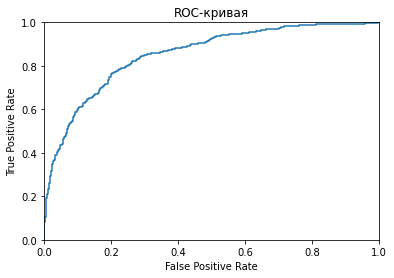

0.8524519878693574

F1 score модели на тестовой выборке: 0.6191446028513238


In [60]:
model = RandomForestClassifier(random_state = 12345, n_estimators = 100, max_depth = 8, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_test)
result = f1_score(target_test, predictions)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)
print("F1 score модели на тестовой выборке:", result)

Значение F1 score модели на тестовых данных получилось 0,619. Площадь roc-кривой составила 0,85 - сильное отличие от случайной модели, что видно из графика. Это говорит о высоком качестве обученной модели и правильно подобранных гиперпараметрах, а также решением проблемы дисбаланса классов.

## Вывод

Перед нами стояла задача - найти и обучить наилучшую модель для предсказания оттока клиентов. Для данного исследования были выбраны 3 модели - Случайный лес, Дерево решений и Логистическая регрессия. При подготовке к обучению мы провели кодирование классов (чтобы получить 0/1 для удобного обучения модели в дальнейшем), произвели масштабирование классов, удалили ненужные столбцы исходного датафрейма, а также заполнили пропущенные значения наиболее подходящими.

Во время обучения моделей мы по началу не учитывали дисбаланс классов, но даже при этом, лидирующую позицию по метрике F1 (среднее гармоническое полноты и точности) заняла модель Случайный лес с количеством n-estimators 5-100, глубиной 5-60(значение метрики у нее составило 0,55). Площадь roc-кривой (показывающей насколько наша модель отличается от случайной составила у нее 0,42, что тоже является высоким показателем.

Затем мы приступили к борьбе с дисбалансом классов. Для этого мы взвешивали классы, уменьшали/увеличивали выборки, изменяли значения порога классификаций. По результатам нашей работы, наибольшее среднее гармоническое полноты и точности получилось у модели Случайный лес при взвешанных классах - оно составило 0,612. Также нами была проверена ROC-кривая и метрика auc-roc, которые позволили увидеть насколько наша обученная на тренировочной выборке модель отличается от случайной. Данные метрики также наилучшие у Случайного леса.

В конце мы провели тестирование модели Случайного леса с количеством n-estimators 100, глубиной 8 и class_weight='balanced' (данные гиперпараметры подобрали на валидационной выборке) на тестовых данных. На этих данных модель показала наилучшую F1 score равную 0,619 при площади roc-кривой 0,85.

На основании вышеописанного моно сделать вывод, что для решения поставленной задачи лучше всего подходит модель Случайный лес.